In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score,f1_score,recall_score, accuracy_score,precision_score,confusion_matrix

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

# Observations / Comment on Data:

        There data consists of 14 columns , with 13 features and 1 target variable 'Exited'.
        There are no null values present in data.
        Duplicated rows or data is removed , if any was present.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [10]:
df.drop(['RowNumber','CustomerId','Surname'], inplace=True,axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Comment: 
     
     The columns RowNumber ,CustomerId and Surname doesn't show importance in the Data Analysis or Predictions.

## Feature Selection:

        The features can be divided into two categories, namely categorical and numerical

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
col_numerical = ['CreditScore','Age','Balance','EstimatedSalary','Exited']
col_categorical = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']

In [13]:
df_numerical = df[col_numerical]
df_categorical = df[col_categorical]

In [14]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [15]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# Exploratory Data Analysis:

## EDA of Numerical Columns:

In [16]:
col_numerical

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']

## EDA Of CreditScore:

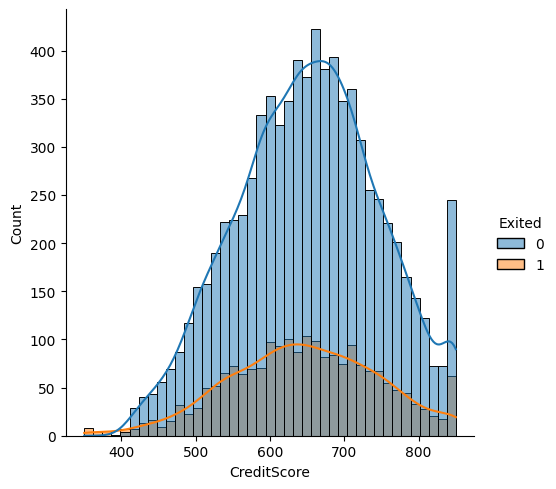

In [17]:
sns.displot(df_numerical, x='CreditScore',hue='Exited', kde=True )

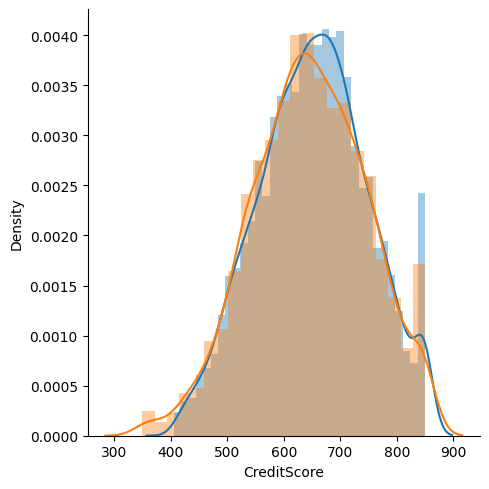

In [18]:
sns.FacetGrid(df_numerical, hue='Exited',height=5).map(sns.distplot,'CreditScore' )

### COMMENT:
    
        The graphs for both groups is almost same, hence No particular difference can be observed to infer any difference.

<Axes: ylabel='CreditScore'>

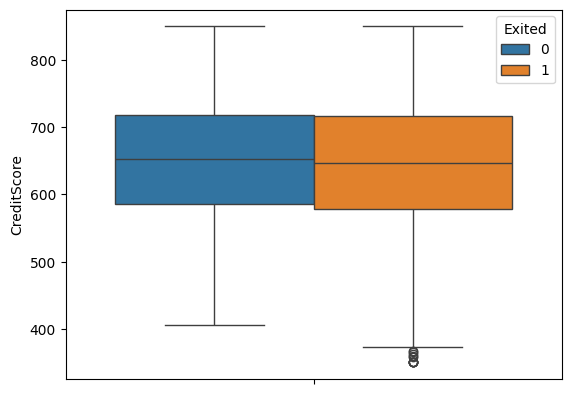

In [19]:
sns.boxplot(df_numerical, hue='Exited',y='CreditScore')

In [20]:
df_numerical[['CreditScore','Exited']].groupby('Exited').describe()

CreditScore                                                           
             count        mean         std    min    25%    50%    75%    max
Exited                                                                       
0           7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1           2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

### COMMENT: 

    The boxplots of CreditScore for two groups doesn't infer any observational difference.
    
    Observations:
        25% of customers have Credit Score less than range of 575-585 for both groups.
        50% of customers have Credit Score less than range of 645-655 for both groups.
        75% of customers have Credit Score less than range of 715-720 for both groups.
        100% of customer have Credit Score less than range of 850 for both groups.

<Axes: ylabel='CreditScore'>

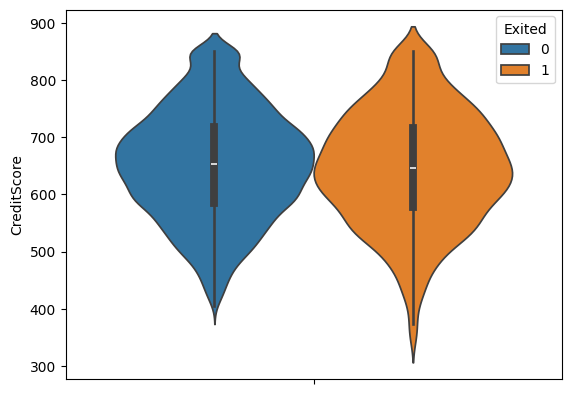

In [21]:
sns.violinplot(df_numerical, y='CreditScore', hue='Exited')

### COMMENT:
    
    No particular inference can be made.

## EDA Of Age:

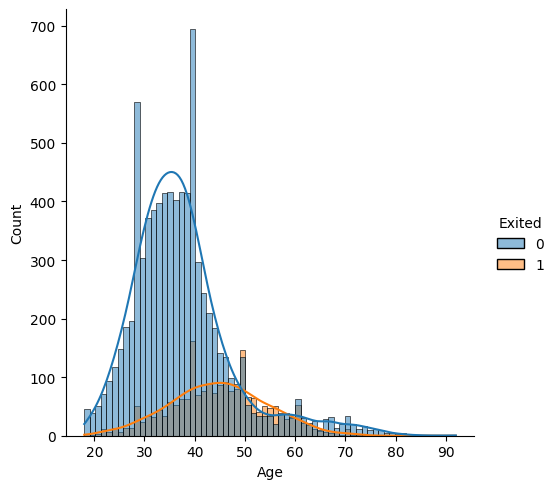

In [22]:
sns.displot(df_numerical, x='Age',hue='Exited', kde=True )

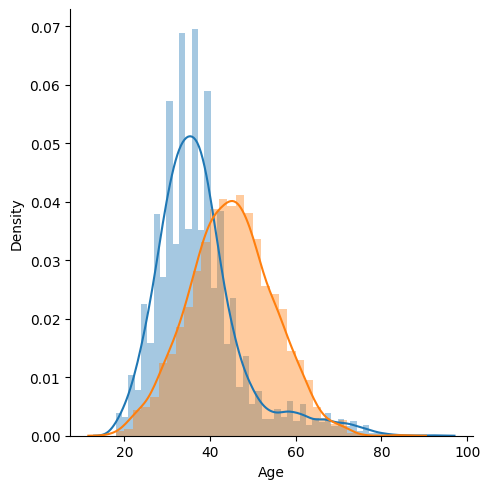

In [23]:
sns.FacetGrid(df_numerical, hue='Exited',height=5).map(sns.distplot,'Age' )
plt.savefig('age_displot.png')

In [24]:
df_numerical[['Age','Exited']].groupby('Exited').describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

### COMMENT:

     We can observe there is a clear difference between the two groups,
     
     The age group of 30-40 have more chances to stay.
     The age group of 40-50 are more likely to exit.

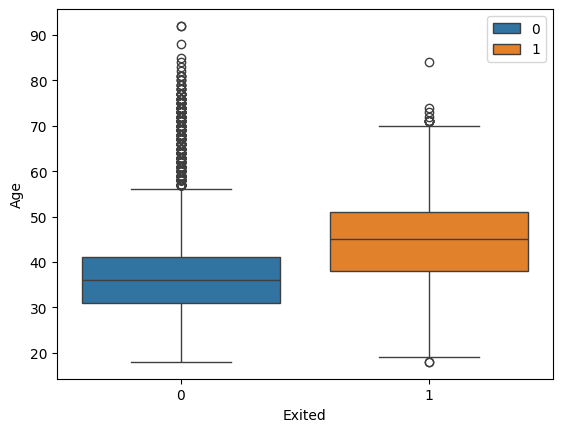

In [25]:
sns.boxplot(df_numerical, x='Exited',y='Age',hue='Exited')
plt.legend()

In [26]:
df_numerical[['Age','Exited']].groupby('Exited').describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

### COMMENT:
    
    The IQR of both the groups are almost overlapping between the range of 37 - 40

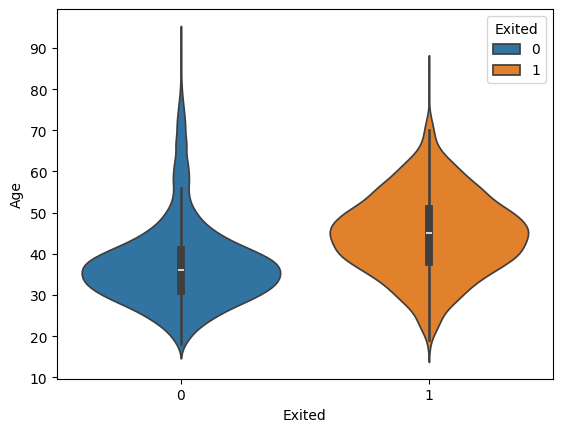

In [27]:
sns.violinplot(df_numerical,x='Exited',y='Age',hue='Exited')
plt.savefig('age_violing.png')

### COMMENT:

    Observations are same to that of Distribution Density Plot, no new particular observations can be observed

## EDA Of Balance

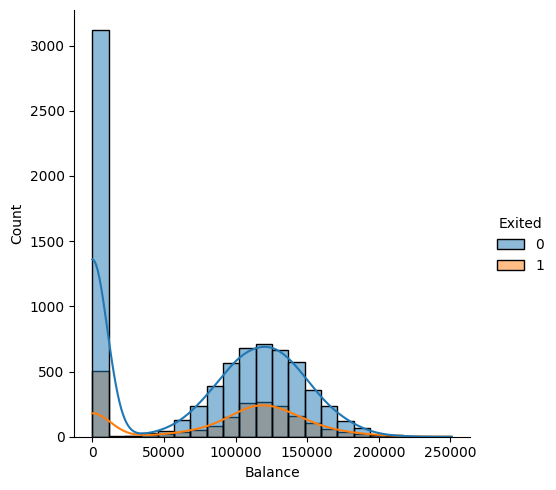

In [29]:
sns.displot(df_numerical, x='Balance',hue='Exited', kde=True )

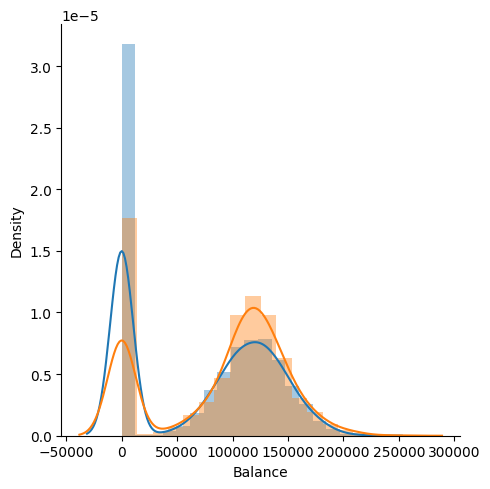

In [30]:
sns.FacetGrid(df_numerical, hue='Exited',height=5).map(sns.distplot,'Balance' )

### COMMENT:
    
    The Distribution Density of Balance for both the groups doesn't show any difference.

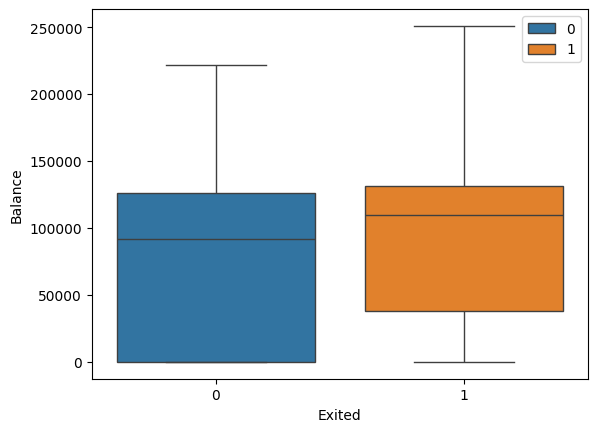

In [31]:
sns.boxplot(df_numerical, x='Exited',y='Balance',hue='Exited')
plt.legend()

### COMMENT:

    The Box Plot of Balance between two groups show The IQR is almost overlapping for both the groups, hence no insights can be 
    made.

<Axes: xlabel='Exited', ylabel='Balance'>

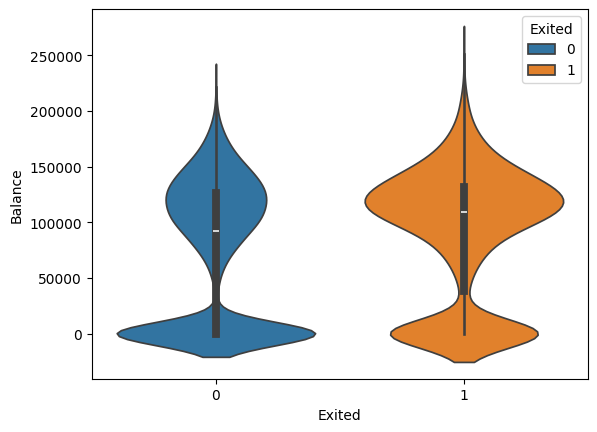

In [32]:
sns.violinplot(df_numerical,x='Exited',y='Balance',hue='Exited')

## EDA Of Estimated Salary

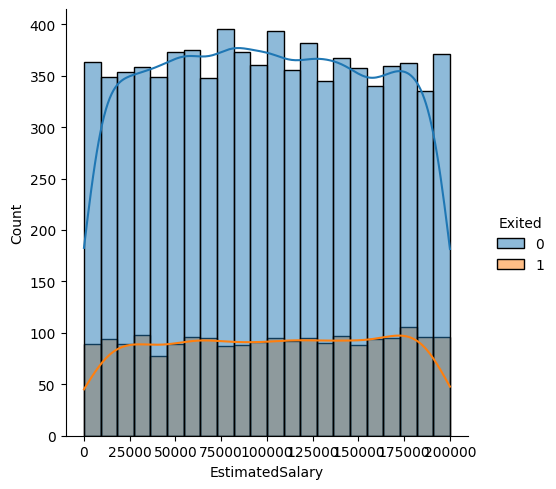

In [33]:
sns.displot(df_numerical, x='EstimatedSalary',hue='Exited', kde=True )

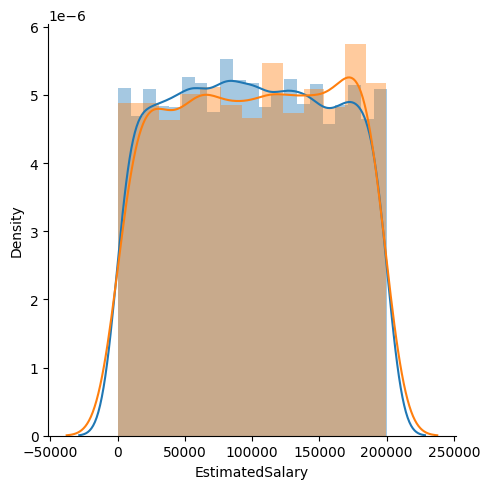

In [34]:
sns.FacetGrid(df_numerical, hue='Exited',height=5).map(sns.distplot,'EstimatedSalary' )

### COMMENT:
    
    The Density Plot of Estimated Salary for both the groups does'nt show any valuable insights.

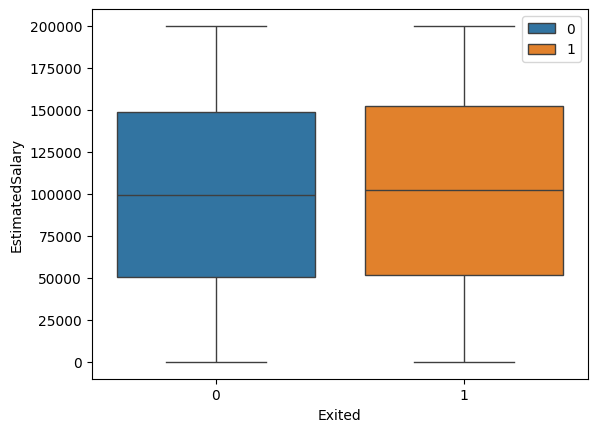

In [35]:
sns.boxplot(df_numerical, x='Exited',y='EstimatedSalary',hue='Exited')
plt.legend()

### COMMENT:
    
    The BoxPlots of Estimated Salary of both the groups does'nt show any difference, hence no insights can be made.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

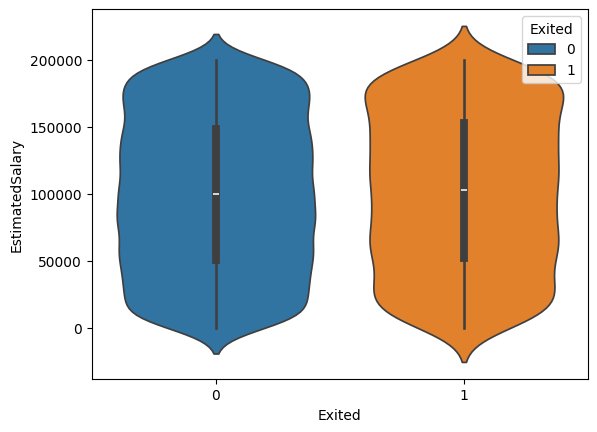

In [36]:
sns.violinplot(df_numerical,x='Exited',y='EstimatedSalary',hue='Exited')

### COMMENT:
    
    The Violin plots does'nt show any valuable observations.

## Bivariate Analysis:

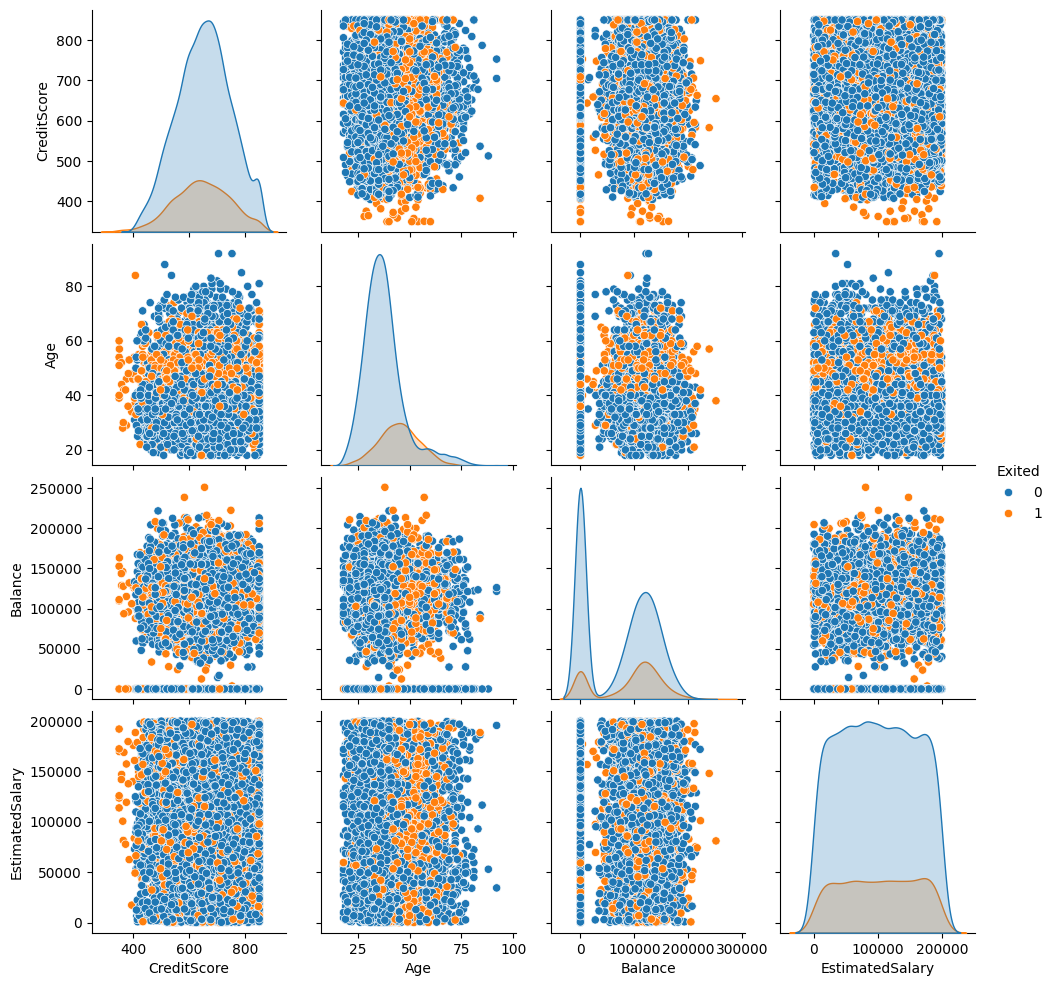

In [37]:
sns.pairplot(df_numerical,hue='Exited')

### COMMENT:
    
        Pairplot are a scatter plots plotted between two different features and a distribution plot for the same feature.
        
        Observations:
            We can observe some patterns between Age - CreditScore, Balance - Age and Estimated Salary - Age. 

### Scatter Plots:
    
    The scatter plots are plotted between Age and Credit Score, Balance and Estimated Salary, between two groups of Exited.

### Scatter Plot : Age - Credit Score

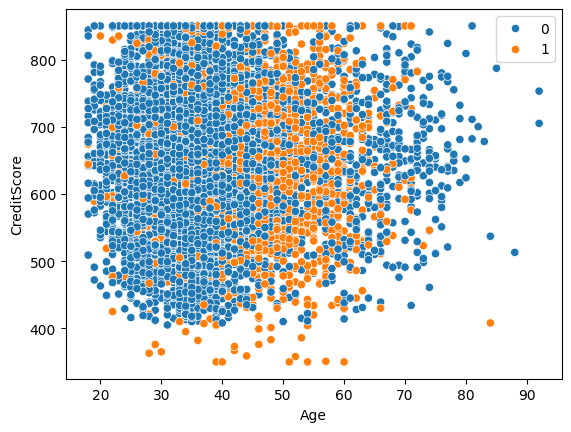

In [38]:
sns.scatterplot(df_numerical, x='Age',y='CreditScore',hue='Exited')
plt.savefig('age_cs.png')
plt.legend()

### COMMENT:
    In the scatter plot we can observe that there is observably more density of Exited points in Age range of 40-60 for all the values of Credit Scores.

### Scatter Plot: Age - Balance

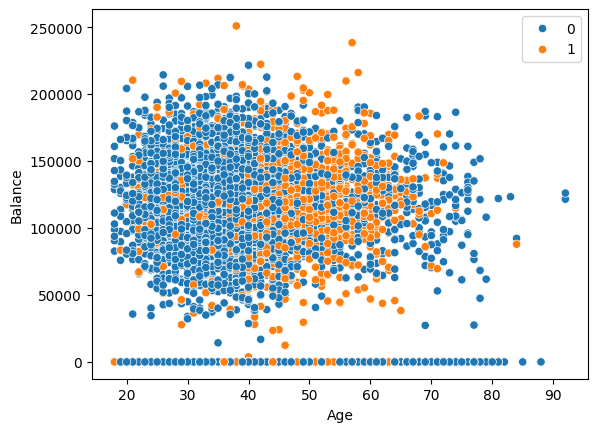

In [39]:
sns.scatterplot(df_numerical, x='Age',y='Balance',hue='Exited')
plt.savefig('age-bal.png')
plt.legend()

### COMMENT:
    We can observe there is a density of points of Exited points in the Age range of 45 - 60 and with Balance range of 100000 - 150000

### Scatter Plot: Age - Estimated Salary

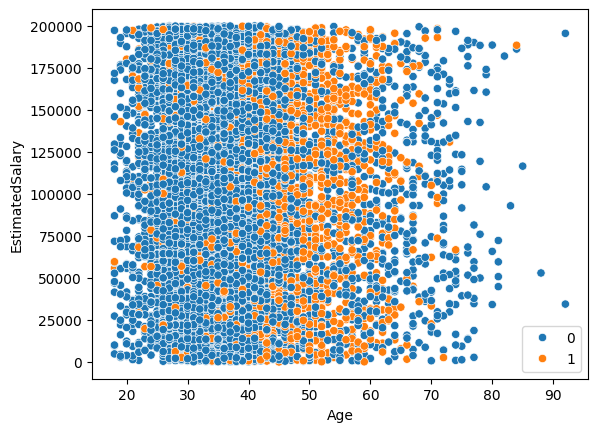

In [40]:
sns.scatterplot(df_numerical, x='Age',y='EstimatedSalary',hue='Exited')
plt.legend()
plt.savefig('age-es.png')

###  COMMENT:
    We can observe there is density of people exited in the plot along the whole range of Estimated Salary, There is increased density of people exited in the rang of 40 - 60.

## Data Preprocessing/ Cleaning:
    
    Objective:
    we have observed that there are outliers present in the columns of CreditScore and Age, we strive to remove them.

## Normalization:

In [41]:
scaler = MinMaxScaler()
for col in df_numerical.columns:
    scaled=scaler.fit_transform(df_numerical[col].values.reshape(-1,1))
    df_numerical[col] = pd.DataFrame(scaled)

In [42]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1.0
1,0.516,0.310811,0.334031,0.562709,0.0
2,0.304,0.324324,0.636357,0.569654,1.0
3,0.698,0.283784,0.000000,0.469120,0.0
4,1.000,0.337838,0.500246,0.395400,0.0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0.0
9996,0.332,0.229730,0.228657,0.508490,0.0
9997,0.718,0.243243,0.000000,0.210390,1.0
9998,0.844,0.324324,0.299226,0.464429,1.0


## EDA Of Categorical Columns:

In [43]:
col_categorical

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [44]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


### EDA Of Geography:

In [45]:
df_categorical.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

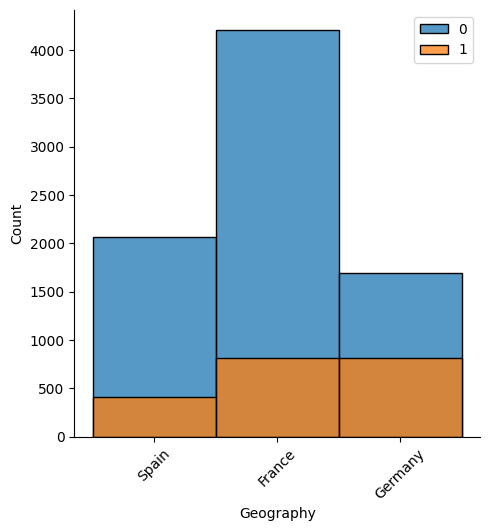

In [46]:
sns.FacetGrid(df_categorical, hue='Exited',height=5).map(sns.histplot,'Geography' )
plt.legend()
plt.savefig('geography.png')
plt.xticks(rotation=45);

### OBSERVATIONS:
    Key observations made on the histogram plot is:
        i) We can observe that the percentage of people from Germany Exiting the bank is almost 50% of that of people stayed.
        ii) The percentage of people from spain and France who exited is very less compared to that of people who stayed. 

### EDA of Gender:

In [47]:
df_categorical.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

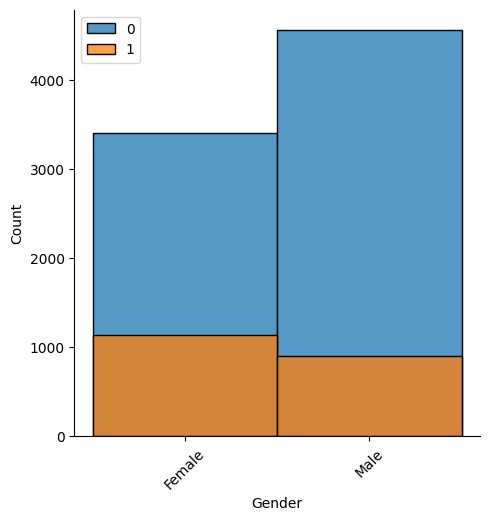

In [48]:
sns.FacetGrid(df_categorical, hue='Exited',height=5).map(sns.histplot,'Gender' )
plt.legend()
plt.savefig('gender.png')
plt.xticks(rotation=45);


### COMMENT:
    we can observe that females are more likely to exit the bank compared to male.

### EDA of Tenure:

In [49]:
b = df_categorical.Tenure.value_counts()

Text(0, 0.5, 'Count')

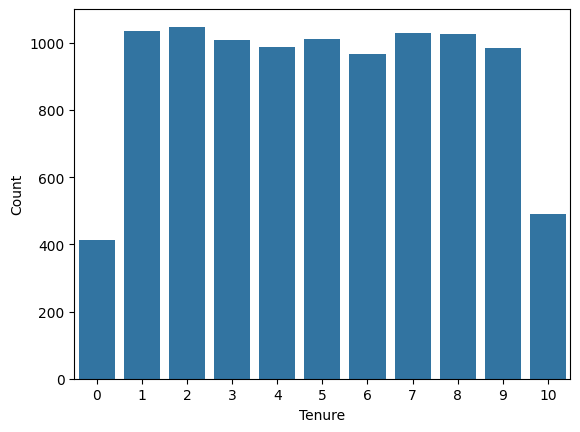

In [50]:
sns.barplot(y=b.values,x= b.index)
#plt.xticks(label=list(np.arange(0,11,1)))
plt.ylabel('Count')

### COMMENT:
    We can observe that the count of people with tenures of 1-9 is almost same, and there are very less people with tenure period of 0 and the people with tenure period 10 is also tends to be very less.

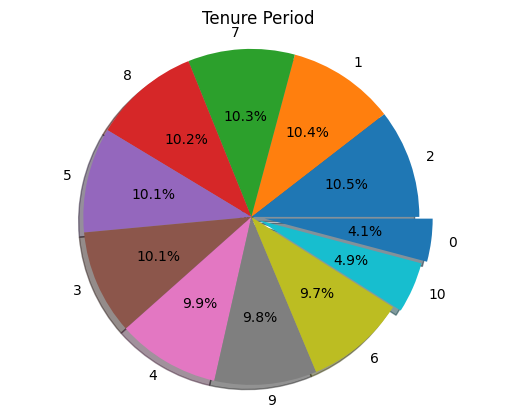

In [51]:
plt.pie(x=b.values, labels=b.index, autopct='%1.1f%%',shadow=True, explode=[0,0,0,0,0,0,0,0,0,0.05,0.08]);
plt.axis('equal')
plt.title('Tenure Period')
plt.savefig('tenure-pie.png')

### EDA of NumOfProducts:

In [52]:
numproducts = df_categorical.NumOfProducts.value_counts()
numproducts

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Graph NumOfProducts vs Count')

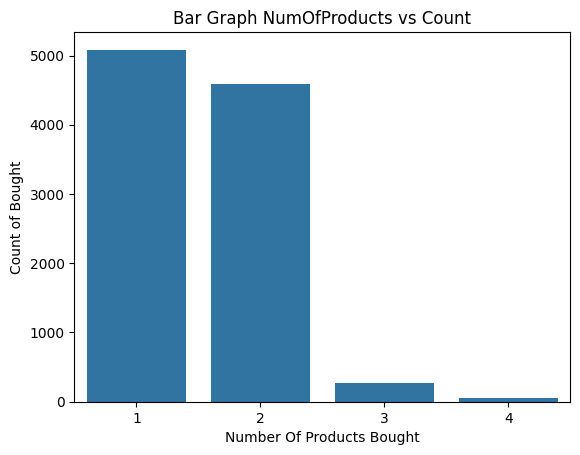

In [53]:
sns.barplot(x=numproducts.index, y=numproducts.values)
plt.xlabel('Number Of Products Bought')
plt.ylabel('Count of Bought')
plt.title('Bar Graph NumOfProducts vs Count')

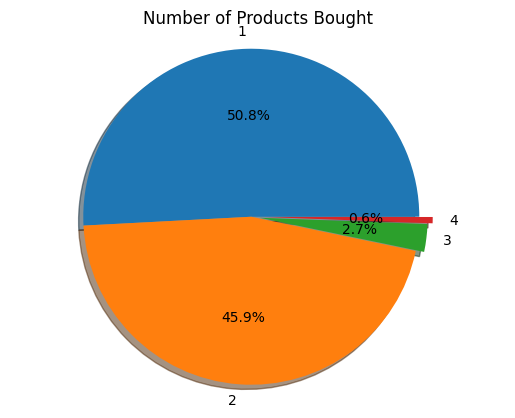

In [54]:
plt.pie(x=numproducts.values, labels=numproducts.index, autopct='%1.1f%%',shadow=True, explode=[0,0,0.05,0.08]);
plt.axis('equal')
plt.title('Number of Products Bought')
plt.savefig('numproducts-pie.png')

### COMMENT:
    We can observe the count of people the number of products decreases as the Number Of Products increases, meaning less people have more number of Products.

### EDA of HasCrCard

In [55]:
credcard = df_categorical.HasCrCard.value_counts()
credcard

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Text(0.5, 0, 'Has Credit Card')

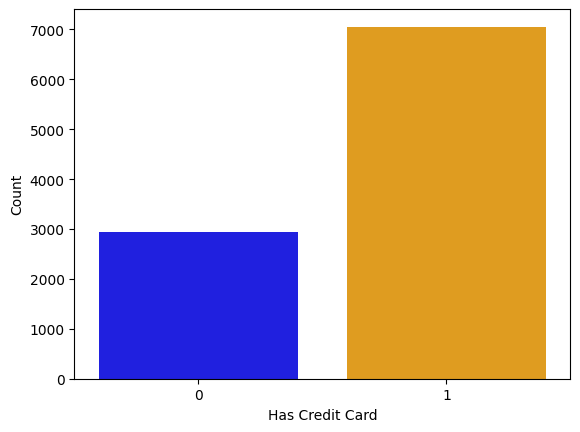

In [56]:
sns.barplot(x=credcard.index, y=credcard.values, palette=['blue','orange'])
plt.ylabel('Count')
plt.xlabel('Has Credit Card')

### COMMENT:
    The count of people with no credit card is very less compared to count of people with credit card.

### EDA of IsActiveMember:

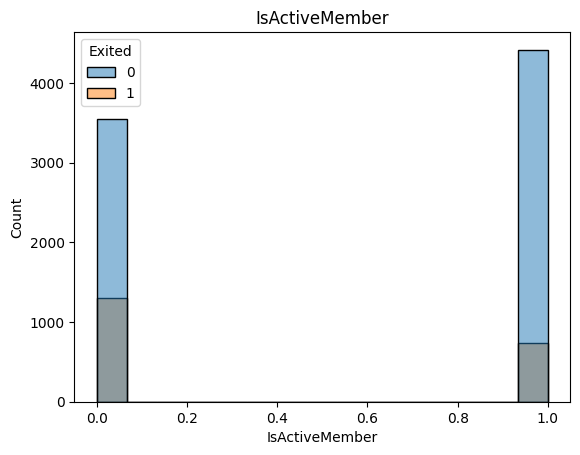

In [57]:
plt.title('IsActiveMember')
sns.histplot(df_categorical,x='IsActiveMember',hue='Exited')
#plt.xticks(labels=[0,1])
plt.savefig('active-member.png')

### COMMENT:
    We can observe that there are less people who exited who were a active member.

## Data Preprocessing / Cleaning:

In [58]:
cat = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical,columns=cat,drop_first=True,dtype=int)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,1,0,0,0
1,1,1,0,1,0,0,1,0
2,8,3,1,0,1,0,0,0
3,1,2,0,0,0,0,0,0
4,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,0,1
9996,10,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,0
9998,3,2,1,0,1,1,0,1


# STATISTICAL ANALYSIS: 

In [59]:
df_stayed = df[df.Exited==0]
df_exited = df[df.Exited==1]
df_stayed.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [60]:
columns_stats = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [61]:
def stats_value(col):
    print(f'\nThe Statistical Values : Mean , Median , Standard Deviation and Mode for Column: {col}')
    print('Mean:')
    print(f'{np.mean(df_stayed[col])} for customers who stayed')
    print(f'{np.mean(df_exited[col])} for customers who exited.\n')
    
    print('Median:')
    print(f'{np.median(df_stayed[col])} for customers who stayed')
    print(f'{np.median(df_exited[col])} for customers who exited.\n')
    
    print('Standard Deviation:')
    print(f'{np.std(df_stayed[col])} for customers who stayed')
    print(f'{np.std(df_exited[col])} for customers who exited.\n')
    
    

In [62]:
stats_value('CreditScore')


The Statistical Values : Mean , Median , Standard Deviation and Mode for Column: CreditScore
Mean:
651.8531960316463 for customers who stayed
645.3514972999509 for customers who exited.

Median:
653.0 for customers who stayed
646.0 for customers who exited.

Standard Deviation:
95.64783071535224 for customers who stayed
100.29687481012593 for customers who exited.



### COMMENT:
    The statistics values of mean, median, std of stayed and exited groups are almost same and show same characteristics

In [63]:
stats_value('Age')


The Statistical Values : Mean , Median , Standard Deviation and Mode for Column: Age
Mean:
37.40838879819164 for customers who stayed
44.8379970544919 for customers who exited.

Median:
36.0 for customers who stayed
45.0 for customers who exited.

Standard Deviation:
10.124727115441685 for customers who stayed
9.759165198148017 for customers who exited.



### COMMENT:
    The Mean of stayed is less than exited, meaning the people with more age tends to leave the company.
    The Median of stayed is less than exited , meaning the people with more age tends to leave the bank and people with less age tends to not exit the bank.
    The std deviation is almost same for both groups.

In [64]:
stats_value('Tenure')


The Statistical Values : Mean , Median , Standard Deviation and Mode for Column: Tenure
Mean:
5.033278914981791 for customers who stayed
4.932744231713304 for customers who exited.

Median:
5.0 for customers who stayed
5.0 for customers who exited.

Standard Deviation:
2.880476859921154 for customers who stayed
2.935385486226051 for customers who exited.



### COMMENT:
    The statistical values of Mean,Median and Std are same for both groups and does'nt infer any characteristics differences.

In [65]:
stats_value('Balance')


The Statistical Values : Mean , Median , Standard Deviation and Mode for Column: Balance
Mean:
72745.2967788522 for customers who stayed
91108.53933726068 for customers who exited.

Median:
92072.68 for customers who stayed
109349.29 for customers who exited.

Standard Deviation:
62844.094322750316 for customers who stayed
58346.467874479276 for customers who exited.



### COMMENT:
    The Mean of stayed group is less compared to exited group, this infers that the people who has more Balance accounts are more likely to exit the bank.
    
    The Median of stayed group is less compared to exited group, this infers that number of people in exited group has more balance.
    
    The Standard Deviation of exited group is less than the customers who stayed, infering std is less in balance in exited group.

In [66]:
stats_value('EstimatedSalary')


The Statistical Values : Mean , Median , Standard Deviation and Mode for Column: EstimatedSalary
Mean:
99738.39177194524 for customers who stayed
101465.67753068237 for customers who exited.

Median:
99645.04 for customers who stayed
102460.84 for customers who exited.

Standard Deviation:
57401.98233280198 for customers who stayed
57898.20120104492 for customers who exited.



### COMMENT:
    The statistical values of Mean,Median and Std are same for both groups and does'nt infer any characteristics differences.

In [67]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1.0
1,0.516,0.310811,0.334031,0.562709,0.0
2,0.304,0.324324,0.636357,0.569654,1.0
3,0.698,0.283784,0.000000,0.469120,0.0
4,1.000,0.337838,0.500246,0.395400,0.0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0.0
9996,0.332,0.229730,0.228657,0.508490,0.0
9997,0.718,0.243243,0.000000,0.210390,1.0
9998,0.844,0.324324,0.299226,0.464429,1.0


In [68]:
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,1,0,0,0
1,1,1,0,1,0,0,1,0
2,8,3,1,0,1,0,0,0
3,1,2,0,0,0,0,0,0
4,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,0,1
9996,10,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,0
9998,3,2,1,0,1,1,0,1


In [69]:
df_preprocessed = pd.concat([df_categorical.drop(['Exited'],axis=1),df_numerical],axis=1)

In [70]:
df_preprocessed

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,0,0,0,0.538,0.324324,0.000000,0.506735,1.0
1,1,1,0,1,0,1,0,0.516,0.310811,0.334031,0.562709,0.0
2,8,3,1,0,0,0,0,0.304,0.324324,0.636357,0.569654,1.0
3,1,2,0,0,0,0,0,0.698,0.283784,0.000000,0.469120,0.0
4,2,1,1,1,0,1,0,1.000,0.337838,0.500246,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0.0
9996,10,1,1,1,0,0,1,0.332,0.229730,0.228657,0.508490,0.0
9997,7,1,0,1,0,0,0,0.718,0.243243,0.000000,0.210390,1.0
9998,3,2,1,0,1,0,1,0.844,0.324324,0.299226,0.464429,1.0


In [71]:
X = df_preprocessed.iloc[:,:11]
X

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,0,0,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,0,0,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,0,0,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,0,0,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,1,0,1,0.844,0.324324,0.299226,0.464429


In [72]:
y = df_preprocessed.iloc[:,11:]
y

,Exited
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,1.0
9998,1.0


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Machine Learning Models:

## KNN (K Nearest Neighbours):
    
    We will apply KNN Model on our data for the classification problem.

In [74]:
knn_model = KNeighborsClassifier()


knn_params = [{'n_neighbors':np.arange(1,10,1)}]

grid_search = GridSearchCV(knn_model,knn_params,scoring='accuracy',cv=4)

grid_search.fit(X_train,y_train)

knn_best = grid_search.best_estimator_

print(f'The best Knn Model : {knn_best}')
print(f'The training accuracy is:{knn_best.score(X_train,y_train)}')
print(f'The training accuracy is:{knn_best.score(X_test,y_test)}')

The best Knn Model : KNeighborsClassifier(n_neighbors=4)
The training accuracy is:0.85325
The training accuracy is:0.8195


In [75]:
x_train_predicted = knn_best.predict(X_train)
x_test_predicted = knn_best.predict(X_test)

In [76]:
# Roc Auc Score
ra_score_knn_train = roc_auc_score(y_train,x_train_predicted)
print(f'The Roc-Auc Score :{ra_score_knn_train}')
ra_score_knn_test = roc_auc_score(y_test,x_test_predicted)
print(f'The Roc-Auc Score : {ra_score_knn_test}\n')


# F1 score
knn_f1_score_train = f1_score(y_train,x_train_predicted)
print(f'The f1 score for Train Data: {knn_f1_score_train}')
knn_f1_score_test = f1_score(y_test,x_test_predicted)
print(f'The f1 score for Test Data: {knn_f1_score_test}\n')

# Precision Score 
knn_precision_score_train = precision_score(y_train,x_train_predicted)
print(f'The Precision score for Train Data: {knn_precision_score_train}')
knn_precision_score_test =precision_score(y_test,x_test_predicted)
print(f'The Precision score for Test Data: {knn_precision_score_test}\n')

#Recall 
knn_recall_score_train = recall_score(y_train,x_train_predicted)
print(f'The recall score for Train Data: {knn_recall_score_train}')
knn_recall_score_test = recall_score(y_test,x_test_predicted)
print(f'The recall score for Test Data: {knn_recall_score_test}\n')

# Accuracy Score
knn_acc_score_train = accuracy_score(y_train,x_train_predicted)
print(f'The Accuracy score for Train Data: {knn_acc_score_train}')
knn_acc_score_test = accuracy_score(y_test,x_test_predicted)
print(f'The Accuracy score for Test Data: {knn_acc_score_test}')

The Roc-Auc Score :0.6621090250949732
The Roc-Auc Score : 0.5830020061721064

The f1 score for Train Data: 0.4859894921190893
The f1 score for Test Data: 0.29629629629629634

The Precision score for Train Data: 0.8671875
The Precision score for Test Data: 0.6333333333333333

The recall score for Train Data: 0.3375912408759124
The recall score for Test Data: 0.19338422391857507

The Accuracy score for Train Data: 0.85325
The Accuracy score for Test Data: 0.8195


### Confusion Matrix:

[[6271   85]
 [1089  555]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

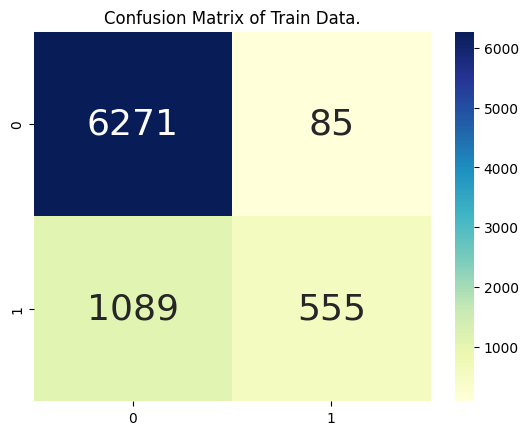

In [77]:
x_knn_cf_train = confusion_matrix(y_train,x_train_predicted)
print(x_knn_cf_train)
sns.heatmap(x_knn_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1563   44]
 [ 317   76]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

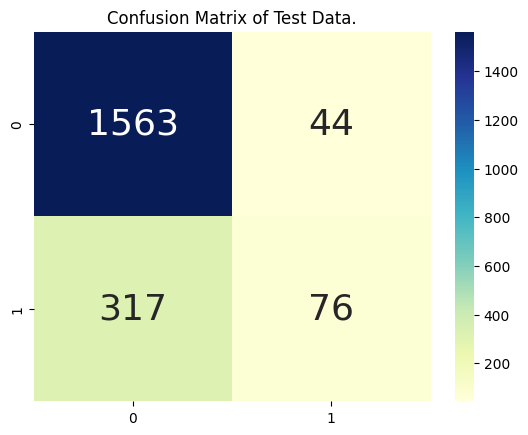

In [78]:
x_knn_cf_test = confusion_matrix(y_test,x_test_predicted)
print(x_knn_cf_test)
sns.heatmap(x_knn_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

## Logistic Regression:

In [79]:
grid_params = [{'C':np.geomspace(0.0001,10000,10)}]

LRmodel = GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),grid_params)
LRmodel.fit(X_train,y_train)

logistic_model = LRmodel.best_estimator_

print(logistic_model)
print('The score for training model:',logistic_model.score(X_train,y_train))
print('The score for test model: ',logistic_model.score(X_test,y_test))

LogisticRegression(C=21.54434690031882, class_weight='balanced', max_iter=400)
The score for training model: 0.70775
The score for test model:  0.7195


In [80]:
lr_train_predicted = logistic_model.predict(X_train)
lr_test_predicted = logistic_model.predict(X_test)

In [81]:
# Roc Auc Score
ra_score_lr_train = roc_auc_score(y_train,lr_train_predicted)
print(f'The Roc-Auc Score :{ra_score_lr_train}')
ra_score_lr_test = roc_auc_score(y_test,lr_test_predicted)
print(f'The Roc-Auc Score : {ra_score_lr_test}\n')


# F1 score
lr_f1_score_train = f1_score(y_train,lr_train_predicted)
print(f'The f1 score for Train Data: {lr_f1_score_train}')
lr_f1_score_test = f1_score(y_test,lr_test_predicted)
print(f'The f1 score for Test Data: {lr_f1_score_test}\n')

# Precision Score 
lr_precision_score_train = precision_score(y_train,lr_train_predicted)
print(f'The Precision score for Train Data: {lr_precision_score_train}')
lr_precision_score_test =precision_score(y_test,lr_test_predicted)
print(f'The Precision score for Test Data: {lr_precision_score_test}\n')

#Recall 
lr_recall_score_train = recall_score(y_train,lr_train_predicted)
print(f'The recall score for Train Data: {lr_recall_score_train}')
lr_recall_score_test = recall_score(y_test,lr_test_predicted)
print(f'The recall score for Test Data: {lr_recall_score_test}\n')

# Accuracy Score
lr_acc_score_train = accuracy_score(y_train,lr_train_predicted)
print(f'The Accuracy score for Train Data: {lr_acc_score_train}')
lr_acc_score_test = accuracy_score(y_test,lr_test_predicted)
print(f'The Accuracy score for Test Data: {lr_acc_score_test}')

The Roc-Auc Score :0.7010893781609882
The Roc-Auc Score : 0.7168439286771774

The f1 score for Train Data: 0.49240121580547114
The f1 score for Test Data: 0.49955396966993754

The Precision score for Train Data: 0.3828494260634706
The Precision score for Test Data: 0.38461538461538464

The recall score for Train Data: 0.6897810218978102
The recall score for Test Data: 0.712468193384224

The Accuracy score for Train Data: 0.70775
The Accuracy score for Test Data: 0.7195


[[4528 1828]
 [ 510 1134]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

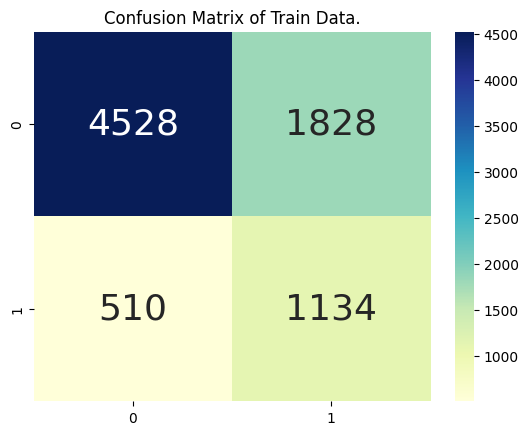

In [82]:
x_lr_cf_train = confusion_matrix(y_train,lr_train_predicted)
print(x_lr_cf_train)
sns.heatmap(x_lr_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1159  448]
 [ 113  280]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

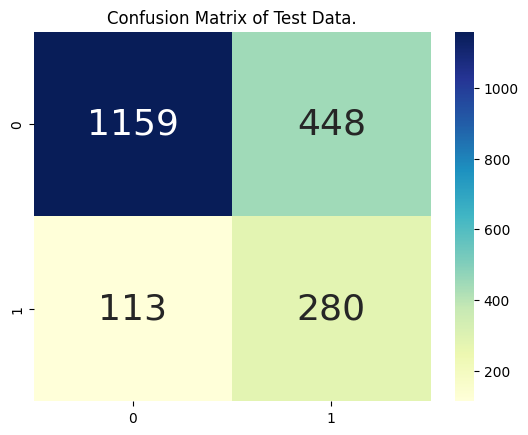

In [83]:
x_lr_cf_test = confusion_matrix(y_test,lr_test_predicted)
print(x_lr_cf_test)
sns.heatmap(x_lr_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

In [84]:
dt_params = [{'max_depth':np.arange(1,10,1),'min_samples_split':np.arange(2,10,1)}]
dt_model = DecisionTreeClassifier()

dt_gridsearch = GridSearchCV(dt_model,dt_params,cv=4)
dt_gridsearch.fit(X_train,y_train)

dt_model = dt_gridsearch.best_estimator_
print(f'The Decision Tree Model is: {dt_model}')

print(f'The Accuracy score for Train Dataset: {dt_model.score(X_train,y_train)}')
print(f'The Accuracy score for Test Dataset: {dt_model.score(X_test,y_test)}')

The Decision Tree Model is: DecisionTreeClassifier(max_depth=7, min_samples_split=8)
The Accuracy score for Train Dataset: 0.87425
The Accuracy score for Test Dataset: 0.8575


In [85]:
dt_train_predicted = dt_model.predict(X_train)
dt_test_predicted = dt_model.predict(X_test)

In [86]:
# Roc Auc Score
ra_score_dt_train = roc_auc_score(y_train,dt_train_predicted)
print(f'The Roc-Auc Score :{ra_score_dt_train}')
ra_score_dt_test = roc_auc_score(y_test,dt_test_predicted)
print(f'The Roc-Auc Score : {ra_score_dt_test}\n')


# F1 score
dt_f1_score_train = f1_score(y_train,dt_train_predicted)
print(f'The f1 score for Train Data: {dt_f1_score_train}')
dt_f1_score_test = f1_score(y_test,dt_test_predicted)
print(f'The f1 score for Test Data: {dt_f1_score_test}\n')

# Precision Score 
dt_precision_score_train = precision_score(y_train,dt_train_predicted)
print(f'The Precision score for Train Data: {dt_precision_score_train}')
dt_precision_score_test =precision_score(y_test,lr_test_predicted)
print(f'The Precision score for Test Data: {dt_precision_score_test}\n')

#Recall 
dt_recall_score_train = recall_score(y_train,dt_train_predicted)
print(f'The recall score for Train Data: {dt_recall_score_train}')
dt_recall_score_test = recall_score(y_test,dt_test_predicted)
print(f'The recall score for Test Data: {dt_recall_score_test}\n')

# Accuracy Score
dt_acc_score_train = accuracy_score(y_train,dt_train_predicted)
print(f'The Accuracy score for Train Data: {dt_acc_score_train}')
dt_acc_score_test = accuracy_score(y_test,dt_test_predicted)
print(f'The Accuracy score for Test Data: {dt_acc_score_test}')

The Roc-Auc Score :0.7440933638962516
The Roc-Auc Score : 0.7104501457522828

The f1 score for Train Data: 0.6309611151870873
The f1 score for Test Data: 0.563552833078101

The Precision score for Train Data: 0.7948243992606284
The Precision score for Test Data: 0.38461538461538464

The recall score for Train Data: 0.5231143552311436
The recall score for Test Data: 0.4681933842239186

The Accuracy score for Train Data: 0.87425
The Accuracy score for Test Data: 0.8575


[[6134  222]
 [ 784  860]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

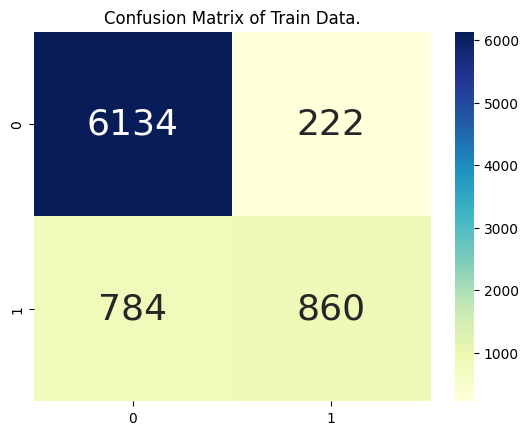

In [87]:
x_dt_cf_train = confusion_matrix(y_train,dt_train_predicted)
print(x_dt_cf_train)
sns.heatmap(x_dt_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1531   76]
 [ 209  184]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

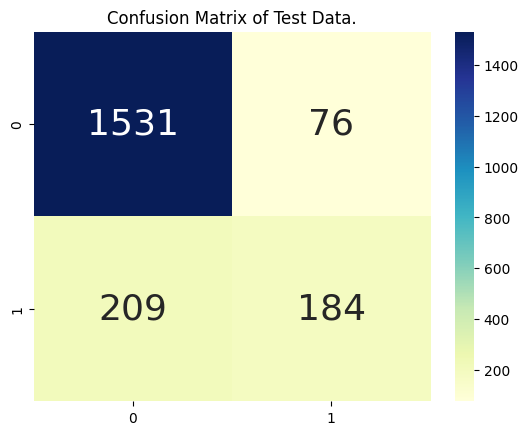

In [88]:
x_dt_cf_test = confusion_matrix(y_test,dt_test_predicted)
print(x_dt_cf_test)
sns.heatmap(x_dt_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

## Random Forest:

In [89]:
rf_model = RandomForestClassifier()
rf_params = [{'max_depth':np.arange(1,15,1),'n_estimators':np.arange(50,400,50)}]

rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=4)
rf_gridsearch.fit(X_train,y_train)

rf_model = rf_gridsearch.best_estimator_
print(f'The Random Forest Model is: {rf_model}')

print(f'The Accuracy score for Train Dataset: {rf_model.score(X_train,y_train)}')
print(f'The Accuracy score for Test Dataset: {rf_model.score(X_test,y_test)}')

The Random Forest Model is: RandomForestClassifier(max_depth=13, n_estimators=300)
The Accuracy score for Train Dataset: 0.943125
The Accuracy score for Test Dataset: 0.8665


In [90]:
rf_train_predicted = rf_model.predict(X_train)
rf_test_predicted = rf_model.predict(X_test)

In [91]:
# Roc Auc Score
ra_score_rf_train = roc_auc_score(y_train,rf_train_predicted)
print(f'The Roc-Auc Score :{ra_score_rf_train}')
ra_score_rf_test = roc_auc_score(y_test,rf_test_predicted)
print(f'The Roc-Auc Score : {ra_score_rf_test}\n')


# F1 score
rf_f1_score_train = f1_score(y_train,rf_train_predicted)
print(f'The f1 score for Train Data: {rf_f1_score_train}')
rf_f1_score_test = f1_score(y_test,dt_test_predicted)
print(f'The f1 score for Test Data: {rf_f1_score_test}\n')

# Precision Score 
rf_precision_score_train = precision_score(y_train,rf_train_predicted)
print(f'The Precision score for Train Data: {rf_precision_score_train}')
rf_precision_score_test =precision_score(y_test,rf_test_predicted)
print(f'The Precision score for Test Data: {rf_precision_score_test}\n')

#Recall 
rf_recall_score_train = recall_score(y_train,rf_train_predicted)
print(f'The recall score for Train Data: {rf_recall_score_train}')
rf_recall_score_test = recall_score(y_test,rf_test_predicted)
print(f'The recall score for Test Data: {rf_recall_score_test}\n')

# Accuracy Score
rf_acc_score_train = accuracy_score(y_train,rf_train_predicted)
print(f'The Accuracy score for Train Data: {rf_acc_score_train}')
rf_acc_score_test = accuracy_score(y_test,rf_test_predicted)
print(f'The Accuracy score for Test Data: {rf_acc_score_test}')

The Roc-Auc Score :0.8652255316738099
The Roc-Auc Score : 0.7150895177111586

The f1 score for Train Data: 0.8411867364746946
The f1 score for Test Data: 0.563552833078101

The Precision score for Train Data: 0.9868959868959869
The Precision score for Test Data: 0.7625

The recall score for Train Data: 0.7329683698296837
The recall score for Test Data: 0.46564885496183206

The Accuracy score for Train Data: 0.943125
The Accuracy score for Test Data: 0.8665


[[6340   16]
 [ 439 1205]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

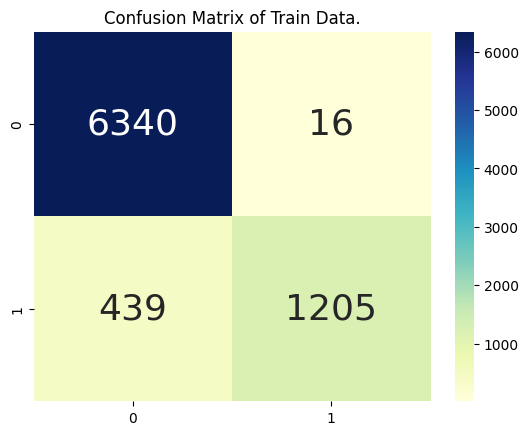

In [92]:
x_rf_cf_train = confusion_matrix(y_train,rf_train_predicted)
print(x_rf_cf_train)
sns.heatmap(x_rf_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1550   57]
 [ 210  183]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

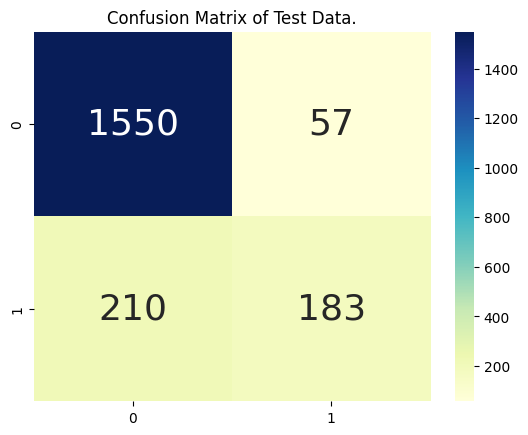

In [93]:
x_rf_cf_test = confusion_matrix(y_test,rf_test_predicted)
print(x_rf_cf_test)
sns.heatmap(x_rf_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

## ADA Boost:

In [94]:
ada_model = AdaBoostClassifier()
ada_params = [{'n_estimators':np.arange(50,200,50),'learning_rate':np.arange(0.1,1.0,.1)}]

ada_gridsearch = GridSearchCV(ada_model,ada_params,cv=4)
ada_gridsearch.fit(X_train,y_train)

ada_model = ada_gridsearch.best_estimator_
print(f'The ADA Boosting Model is : {ada_model}')

print(f'The Accuracy score for Train Dataset: {ada_model.score(X_train,y_train)}')
print(f'The Accuracy score for Test Dataset: {ada_model.score(X_test,y_test)}')

The ADA Boosting Model is : AdaBoostClassifier(learning_rate=0.30000000000000004)
The Accuracy score for Train Dataset: 0.860625
The Accuracy score for Test Dataset: 0.8605


In [95]:
ada_train_predicted = ada_model.predict(X_train)
ada_test_predicted = ada_model.predict(X_test)

In [96]:
# Roc Auc Score
ra_score_ada_train = roc_auc_score(y_train,ada_train_predicted)
print(f'The Roc-Auc Score :{ra_score_ada_train}')
ra_score_ada_test = roc_auc_score(y_test,ada_test_predicted)
print(f'The Roc-Auc Score : {ra_score_ada_test}\n')


# F1 score
ada_f1_score_train = f1_score(y_train,ada_train_predicted)
print(f'The f1 score for Train Data: {ada_f1_score_train}')
ada_f1_score_test = f1_score(y_test,ada_test_predicted)
print(f'The f1 score for Test Data: {ada_f1_score_test}\n')

# Precision Score 
ada_precision_score_train = precision_score(y_train,ada_train_predicted)
print(f'The Precision score for Train Data: {ada_precision_score_train}')
ada_precision_score_test =precision_score(y_test,ada_test_predicted)
print(f'The Precision score for Test Data: {ada_precision_score_test}\n')

#Recall 
ada_recall_score_train = recall_score(y_train,ada_train_predicted)
print(f'The recall score for Train Data: {ada_recall_score_train}')
ada_recall_score_test = recall_score(y_test,ada_test_predicted)
print(f'The recall score for Test Data: {ada_recall_score_test}\n')

# Accuracy Score
ada_acc_score_train = accuracy_score(y_train,ada_train_predicted)
print(f'The Accuracy score for Train Data: {ada_acc_score_train}')
ada_acc_score_test = accuracy_score(y_test,ada_test_predicted)
print(f'The Accuracy score for Test Data: {ada_acc_score_test}')

The Roc-Auc Score :0.7021491657211456
The Roc-Auc Score : 0.6988612162754868

The f1 score for Train Data: 0.5608507286333202
The f1 score for Test Data: 0.5492730210016156

The Precision score for Train Data: 0.7955307262569833
The Precision score for Test Data: 0.7522123893805309

The recall score for Train Data: 0.43309002433090027
The recall score for Test Data: 0.43256997455470736

The Accuracy score for Train Data: 0.860625
The Accuracy score for Test Data: 0.8605


[[6173  183]
 [ 932  712]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

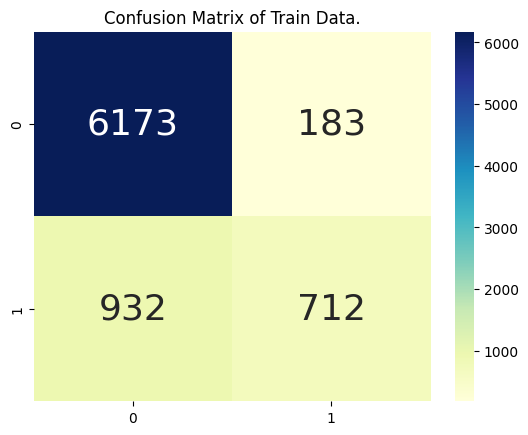

In [97]:
x_ada_cf_train = confusion_matrix(y_train,ada_train_predicted)
print(x_ada_cf_train)
sns.heatmap(x_ada_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1551   56]
 [ 223  170]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

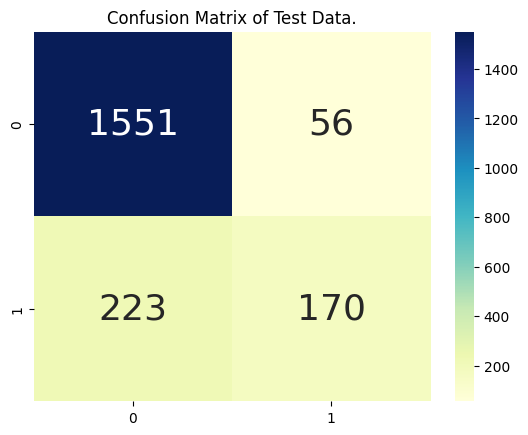

In [98]:
x_ada_cf_test = confusion_matrix(y_test,ada_test_predicted)
print(x_ada_cf_test)
sns.heatmap(x_ada_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

## XG Boosting:

In [99]:
xgb_model = xgb.XGBClassifier(eval_metrics='logloss')
xgb_params = [{'n_estimators':np.arange(50,300,50),'max_depth':np.arange(2,10,1),'learning_rate':np.arange(0.1,1.0,0.1)}]

xgb_grid = GridSearchCV(xgb_model,xgb_params,cv=4)
xgb_grid.fit(X_train,y_train)

xgb_model = xgb_grid.best_estimator_
print(f'The XGB Model is :{xgb_model}')

print(f'The Accuracy score for Train Dataset: {xgb_model.score(X_train,y_train)}')
print(f'The Accuracy score for Test Dataset: {xgb_model.score(X_test,y_test)}')

The XGB Model is :XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)
The Accuracy score for Train Dataset: 0.88925
The Accuracy score for Test Dataset: 0.8675


In [100]:
xgb_train_predicted = xgb_model.predict(X_train)
xgb_test_predicted = xgb_model.predict(X_test)

In [101]:
# Roc Auc Score
ra_score_xgb_train = roc_auc_score(y_train,xgb_train_predicted)
print(f'The Roc-Auc Score :{ra_score_xgb_train}')
ra_score_xgb_test = roc_auc_score(y_test,xgb_test_predicted)
print(f'The Roc-Auc Score : {ra_score_xgb_test}\n')


# F1 score
xgb_f1_score_train = f1_score(y_train,xgb_train_predicted)
print(f'The f1 score for Train Data: {xgb_f1_score_train}')
xgb_f1_score_test = f1_score(y_test,xgb_test_predicted)
print(f'The f1 score for Test Data: {xgb_f1_score_test}\n')

# Precision Score 
xgb_precision_score_train = precision_score(y_train,xgb_train_predicted)
print(f'The Precision score for Train Data: {xgb_precision_score_train}')
xgb_precision_score_test =precision_score(y_test,xgb_test_predicted)
print(f'The Precision score for Test Data: {xgb_precision_score_test}\n')

#Recall 
xgb_recall_score_train = recall_score(y_train,xgb_train_predicted)
print(f'The recall score for Train Data: {xgb_recall_score_train}')
xgb_recall_score_test = recall_score(y_test,xgb_test_predicted)
print(f'The recall score for Test Data: {xgb_recall_score_test}\n')

# Accuracy Score
xgb_acc_score_train = accuracy_score(y_train,xgb_train_predicted)
print(f'The Accuracy score for Train Data: {xgb_acc_score_train}')
xgb_acc_score_test = accuracy_score(y_test,xgb_test_predicted)
print(f'The Accuracy score for Test Data: {xgb_acc_score_test}')

The Roc-Auc Score :0.7632284914994971
The Roc-Auc Score : 0.7253230538784674

The f1 score for Train Data: 0.6708766716196135
The f1 score for Test Data: 0.5929339477726575

The Precision score for Train Data: 0.8616412213740458
The Precision score for Test Data: 0.748062015503876

The recall score for Train Data: 0.5492700729927007
The recall score for Test Data: 0.4910941475826972

The Accuracy score for Train Data: 0.88925
The Accuracy score for Test Data: 0.8675


[[6340   16]
 [ 439 1205]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data.')

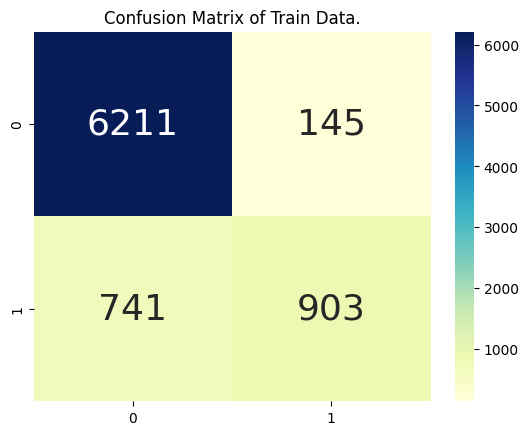

In [102]:
x_xgb_cf_train = confusion_matrix(y_train,xgb_train_predicted)
print(x_rf_cf_train)
sns.heatmap(x_xgb_cf_train,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Train Data.')

[[1551   56]
 [ 223  170]]


Text(0.5, 1.0, 'Confusion Matrix of Test Data.')

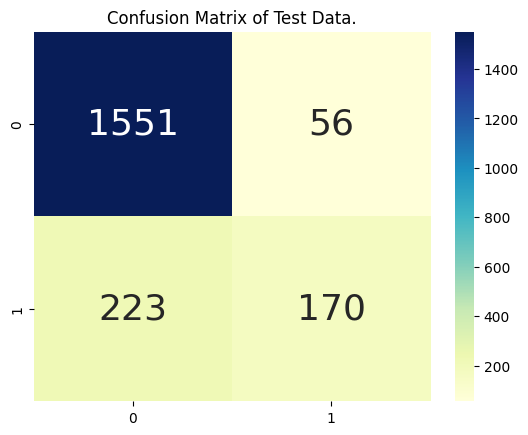

In [103]:
x_ada_cf_test = confusion_matrix(y_test,ada_test_predicted)
print(x_ada_cf_test)
sns.heatmap(x_ada_cf_test,annot=True,annot_kws={'size':26},fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix of Test Data.')

In [104]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


## METRICS COMPARISONS:


In [105]:
columns = (['ALGORITHM','AUC ROC SCORE','ACCURACY','F1','PRECISION','RECALL'])
mytable = PrettyTable()

mytable.add_column(columns[0],['KNN','Logistic Regression','Decision Tree','Random Forest','ADA Boost','XG Boost'])
mytable.add_column(columns[1],[ra_score_knn_train,ra_score_lr_train,ra_score_dt_train,ra_score_rf_train,ra_score_ada_train,ra_score_xgb_train])
mytable.add_column(columns[2],[knn_acc_score_train,lr_acc_score_train,dt_acc_score_train,rf_acc_score_train,ada_acc_score_train,xgb_acc_score_train])
mytable.add_column(columns[3],[knn_f1_score_train,lr_f1_score_train,dt_f1_score_train,rf_f1_score_train,ada_f1_score_train,xgb_f1_score_train])
mytable.add_column(columns[4],[knn_precision_score_train,lr_precision_score_train,dt_precision_score_train,rf_precision_score_train,ada_precision_score_train,xgb_precision_score_train])
mytable.add_column(columns[5],[knn_recall_score_train,lr_recall_score_train,dt_recall_score_train,rf_recall_score_train,ada_recall_score_train,xgb_recall_score_train])


print('The Metrics Table for Training Dataset:')
print(mytable)


data = mytable.get_string()
with open('test.txt','w') as f:
    f.write(str(mytable))

The Metrics Table for Training Dataset:
+---------------------+--------------------+----------+---------------------+--------------------+---------------------+
|      ALGORITHM      |   AUC ROC SCORE    | ACCURACY |          F1         |     PRECISION      |        RECALL       |
+---------------------+--------------------+----------+---------------------+--------------------+---------------------+
|         KNN         | 0.6621090250949732 | 0.85325  |  0.4859894921190893 |     0.8671875      |  0.3375912408759124 |
| Logistic Regression | 0.7010893781609882 | 0.70775  | 0.49240121580547114 | 0.3828494260634706 |  0.6897810218978102 |
|    Decision Tree    | 0.7440933638962516 | 0.87425  |  0.6309611151870873 | 0.7948243992606284 |  0.5231143552311436 |
|    Random Forest    | 0.8652255316738099 | 0.943125 |  0.8411867364746946 | 0.9868959868959869 |  0.7329683698296837 |
|      ADA Boost      | 0.7021491657211456 | 0.860625 |  0.5608507286333202 | 0.7955307262569833 | 0.433090024330

In [106]:
columns = (['ALGORITHM','AUC ROC SCORE','ACCURACY','F1','PRECISION','RECALL'])
mytable = PrettyTable()

mytable.add_column(columns[0],['KNN','Logistic Regression','Decision Tree','Random Forest','ADA Boost','XG Boost'])
mytable.add_column(columns[1],[ra_score_knn_test,ra_score_lr_test,ra_score_dt_test,ra_score_rf_test,ra_score_ada_test,ra_score_xgb_test])
mytable.add_column(columns[2],[knn_acc_score_test,lr_acc_score_test,dt_acc_score_test,rf_acc_score_test,ada_acc_score_test,xgb_acc_score_test])
mytable.add_column(columns[3],[knn_f1_score_test,lr_f1_score_test,dt_f1_score_test,rf_f1_score_test,ada_f1_score_test,xgb_f1_score_test])
mytable.add_column(columns[4],[knn_precision_score_test,lr_precision_score_test,dt_precision_score_test,rf_precision_score_test,ada_precision_score_test,xgb_precision_score_test])
mytable.add_column(columns[5],[knn_recall_score_test,lr_recall_score_test,dt_recall_score_test,rf_recall_score_test,ada_recall_score_test,xgb_recall_score_test])

print('The Metrics Table for Test Dataset:')
print(mytable)

data = mytable.get_string()
with open('test.txt','w') as f:
    f.write(str(mytable))

The Metrics Table for Test Dataset:
+---------------------+--------------------+----------+---------------------+---------------------+---------------------+
|      ALGORITHM      |   AUC ROC SCORE    | ACCURACY |          F1         |      PRECISION      |        RECALL       |
+---------------------+--------------------+----------+---------------------+---------------------+---------------------+
|         KNN         | 0.5830020061721064 |  0.8195  | 0.29629629629629634 |  0.6333333333333333 | 0.19338422391857507 |
| Logistic Regression | 0.7168439286771774 |  0.7195  | 0.49955396966993754 | 0.38461538461538464 |  0.712468193384224  |
|    Decision Tree    | 0.7104501457522828 |  0.8575  |  0.563552833078101  | 0.38461538461538464 |  0.4681933842239186 |
|    Random Forest    | 0.7150895177111586 |  0.8665  |  0.563552833078101  |        0.7625       | 0.46564885496183206 |
|      ADA Boost      | 0.6988612162754868 |  0.8605  |  0.5492730210016156 |  0.7522123893805309 | 0.43256997

# Observations:

    The Algorithm Model of Random Forest is showing the best outcome results, metrics results for both training and testing datasets.

# CONCLUSION:
    The ML Model of Random Forest can be used to solve the classification problem of customer churn.
    The model of XGBoost also showcases good performance metrics, we can use that too.
    